In [ ]:
# pip install python-decouple

In [ ]:
# pip install nasdaq-data-link

In [81]:
import nasdaqdatalink
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

## Using the API

In [ ]:
nasdaqdatalink.ApiConfig.api_key = 'oxbxjNXj99_xwuR31Grw'

In [ ]:
dir(nasdaqdatalink)

In [ ]:
db = nasdaqdatalink.Database("ZILLOW")

In [ ]:
db.data_fields()

In [ ]:
dir(db)

In [ ]:
db.to_list()

In [ ]:
ds = db.datasets()

In [ ]:
dir(ds)

In [ ]:
pd.DataFrame(ds.to_list())

## Using the Downloaded Data

In [2]:
data = pd.read_csv('./data/zillow_data.csv')

In [3]:
data.head()

,indicator_id,region_id,date,value
0,ZATT,3101,1998-01-31,338849.0
1,ZATT,3101,1998-02-28,342993.0
2,ZATT,3101,1998-03-31,346763.0
3,ZATT,3101,1998-04-30,349356.0
4,ZATT,3101,1998-05-31,351981.0


In [4]:
data.shape

(135439925, 4)

In [5]:
indicators = pd.read_csv('./data/zillow_indicators.csv')

In [6]:
indicators.head()

,indicator_id,indicator,category
0,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
2,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
3,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values


In [7]:
indicators.shape

(56, 3)

In [8]:
indicators

,indicator_id,indicator,category
0,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
1,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
2,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
3,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z1BR,ZHVI 1-Bedroom Time Series ($),Home values
9,LSAW,"Median List Price (Smooth, All Homes, Weekly V...",Inventory and sales


In [9]:
regions = pd.read_csv('./data/zillow_regions.csv')

In [10]:
regions.head()

,region_id,region_type,region
0,394913,metro,"New York, NY"
1,207,county,"King County; WA; Seattle-Tacoma-Bellevue, WA"
2,394692,metro,"Houston, TX"
3,272902,neigh,Bedford-Stuyvesant; NY; New York-Newark-Jersey...
4,195267,neigh,"Harlem; NY; New York-Newark-Jersey City, NY-NJ..."


In [11]:
regions.shape

(86098, 3)

In [12]:
regions[regions['region'].str.contains('Denver')]

,region_id,region_type,region
98,394530,metro,"Denver, CO"
266,10181,city,"Arvada; CO; Denver-Aurora-Lakewood, CO; Jeffer..."
428,17163,city,"Brighton; CO; Denver-Aurora-Lakewood, CO; Adam..."
529,45470,city,"Golden; CO; Denver-Aurora-Lakewood, CO; Jeffer..."
627,26213,city,"Northglenn; CO; Denver-Aurora-Lakewood, CO; Ad..."
...,...,...,...
85138,93402,zip,"80453; CO; Denver-Aurora-Lakewood, CO; Jeffers..."
85336,93260,zip,"80131; CO; Denver-Aurora-Lakewood, CO; Douglas..."
85420,93395,zip,"80444; CO; Denver-Aurora-Lakewood, CO; Clear C..."
85869,93406,zip,"80457; CO; Denver-Aurora-Lakewood, CO; Jeffers..."


In [14]:
denver = data[data['region_id'] == 394530]

In [21]:
denver.drop(columns = 'region_id', inplace = True)

/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_23392/3892153405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denver.drop(columns = 'region_id', inplace = True)


In [19]:
denver['date'] = pd.to_datetime(denver['date'])

/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_23392/3172273544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denver['date'] = pd.to_datetime(denver['date'])


In [22]:
denver.to_csv('./data/zillow_data_denver.csv', index = False)

#### Exploring the Denver Data

In [23]:
denver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12529 entries, 1562164 to 60917863
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   indicator_id  12529 non-null  object        
 1   date          12529 non-null  datetime64[ns]
 2   value         12529 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 391.5+ KB


In [24]:
denver.describe()

,value
count,12529.000000
mean,256107.045145
std,189693.731182
min,0.016100
25%,11877.000000
50%,254837.000000
75%,393617.000000
max,936124.000000


In [41]:
home_values = denver[denver['indicator_id'] == 'ZALL']
home_values.drop(columns = 'indicator_id', inplace = True)
home_values.set_index('date', inplace = True)
home_values.sort_index(inplace = True)
home_values.describe()

/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_23392/3694946034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_values.drop(columns = 'indicator_id', inplace = True)
/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_23392/3694946034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_values.sort_index(inplace = True)


,value
count,321.000000
mean,292883.566978
std,111460.231781
min,145146.000000
25%,236881.000000
50%,255064.000000
75%,348365.000000
max,640963.000000


In [42]:
median_sale_price = denver[denver['indicator_id'] == 'SAAM']
median_sale_price.drop(columns = 'indicator_id', inplace = True)
median_sale_price.set_index('date', inplace = True)
median_sale_price.sort_index(inplace = True)
median_sale_price.describe()

/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_23392/1854247357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_sale_price.drop(columns = 'indicator_id', inplace = True)
/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_23392/1854247357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_sale_price.sort_index(inplace = True)


,value
count,175.000000
mean,339062.234286
std,105786.597069
min,220226.000000
25%,245115.500000
50%,309876.000000
75%,415442.000000
max,611959.000000


In [43]:
rentals = denver[denver['indicator_id'] == 'RSSA']
rentals.drop(columns = 'indicator_id', inplace = True)
rentals.set_index('date', inplace = True)
rentals.sort_index(inplace = True)
rentals.describe()

/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_23392/2229229626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rentals.drop(columns = 'indicator_id', inplace = True)
/var/folders/lz/08gb56690psggb6cznf0xhwh0000gn/T/ipykernel_23392/2229229626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rentals.sort_index(inplace = True)


,value
count,103.000000
mean,1635.368932
std,167.444810
min,1236.000000
25%,1543.500000
50%,1653.000000
75%,1742.000000
max,1990.000000


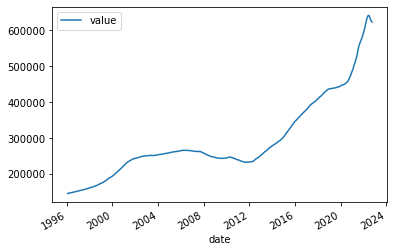

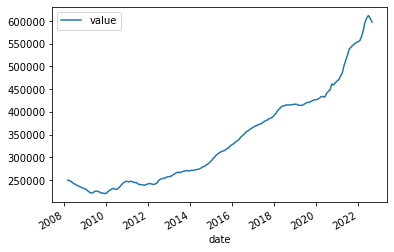

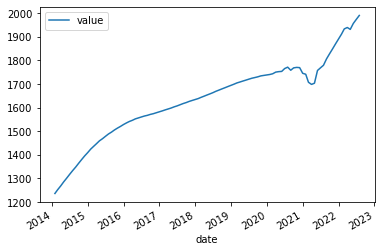

In [37]:
home_values.plot(x = 'date', y = 'value')
median_sale_price.plot(x = 'date', y = 'value')
rentals.plot(x = 'date', y = 'value');

### Augmented Dickey-Fuller Test

In [45]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

#### `home_values` Dataframe

In [46]:
interpret_dftest(adfuller(home_values['value']))

Test Statistic    0.626287
p-value           0.988246
dtype: float64

In [47]:
interpret_dftest(adfuller(home_values['value'].diff().dropna()))

Test Statistic   -4.622415
p-value           0.000117
dtype: float64

This means we set **d = 1** for our ARIMA model for the `home_values` dataframe

#### `median_sale_price` Dataframe

In [48]:
interpret_dftest(adfuller(median_sale_price['value']))

Test Statistic    1.633029
p-value           0.997953
dtype: float64

In [53]:
interpret_dftest(adfuller(median_sale_price['value'].diff().dropna()))

Test Statistic   -2.706878
p-value           0.072856
dtype: float64

In [54]:
interpret_dftest(adfuller(median_sale_price['value'].diff().diff().dropna()))

Test Statistic   -3.094750
p-value           0.026944
dtype: float64

In [56]:
interpret_dftest(adfuller(median_sale_price['value'].diff().diff().diff().dropna()))

Test Statistic   -7.907138e+00
p-value           4.038320e-12
dtype: float64

This means we set **d = 3** for our ARIMA model for the `median_sale_price` dataframe

#### `rentals` Dataframe

In [50]:
interpret_dftest(adfuller(rentals['value']))

Test Statistic   -0.271702
p-value           0.929418
dtype: float64

In [57]:
interpret_dftest(adfuller(rentals['value'].diff().dropna()))

Test Statistic   -3.330890
p-value           0.013553
dtype: float64

In [58]:
interpret_dftest(adfuller(rentals['value'].diff().diff().dropna()))

Test Statistic   -4.644712
p-value           0.000107
dtype: float64

This means we set **d = 2** for our ARIMA model for the `rentals` dataframe

### ARIMA Models

#### `home_values` Dataframe

In [61]:
# Create train-test split.
hv_y_train, hv_y_test = train_test_split(home_values['value'], test_size = 0.1, shuffle = False)

In [62]:
hv_y_train.tail()

date
2019-08-31    440925.0
2019-09-30    441693.0
2019-10-31    442488.0
2019-11-30    443144.0
2019-12-31    444552.0
Name: value, dtype: float64

In [63]:
hv_y_test.head()

date
2020-01-31    446463.0
2020-02-29    448098.0
2020-03-31    447811.0
2020-04-30    449402.0
2020-05-31    451486.0
Name: value, dtype: float64

In [64]:
## Source: Lesson 8.03

# Starting AIC, p, and q.
best_aic = 99999999
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting ARIMA({p}, 1, {q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = hv_y_train, order = (p, 1, q))
            
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting ARIMA(0, 1, 0)
The AIC for ARIMA(0,1,0) is: 5065.257257165042
Attempting ARIMA(0, 1, 1)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No freque

The AIC for ARIMA(0,1,1) is: 5048.165079522984
Attempting ARIMA(0, 1, 2)
The AIC for ARIMA(0,1,2) is: 5033.897878620235
Attempting ARIMA(0, 1, 3)
The AIC for ARIMA(0,1,3) is: 5025.580787420315
Attempting ARIMA(0, 1, 4)
The AIC for ARIMA(0,1,4) is: 5017.39780562056
Attempting ARIMA(1, 1, 0)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py

The AIC for ARIMA(1,1,0) is: 6037.158119873783
Attempting ARIMA(1, 1, 1)
The AIC for ARIMA(1,1,1) is: 4841.062759887951
Attempting ARIMA(1, 1, 2)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No freque

The AIC for ARIMA(1,1,2) is: 4842.847471567882
Attempting ARIMA(1, 1, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: Val

The AIC for ARIMA(1,1,3) is: 4888.081865227987
Attempting ARIMA(1, 1, 4)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: Val

The AIC for ARIMA(1,1,4) is: 4889.369357427438
Attempting ARIMA(2, 1, 0)
The AIC for ARIMA(2,1,0) is: 5027.716487808263
Attempting ARIMA(2, 1, 1)
The AIC for ARIMA(2,1,1) is: 4842.8460052890305
Attempting ARIMA(2, 1, 2)
The AIC for ARIMA(2,1,2) is: 5163.372891466655
Attempting ARIMA(2, 1, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: Val

The AIC for ARIMA(2,1,3) is: 4849.245351036916
Attempting ARIMA(2, 1, 4)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: Val

The AIC for ARIMA(2,1,4) is: 4854.655650404087
Attempting ARIMA(3, 1, 0)
The AIC for ARIMA(3,1,0) is: 5010.643993708702
Attempting ARIMA(3, 1, 1)
The AIC for ARIMA(3,1,1) is: 4844.793608075276
Attempting ARIMA(3, 1, 2)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: Val

The AIC for ARIMA(3,1,2) is: 4900.770730487389
Attempting ARIMA(3, 1, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


The AIC for ARIMA(3,1,3) is: 5240.086116389929
Attempting ARIMA(3, 1, 4)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: Val

The AIC for ARIMA(3,1,4) is: 5057.974782305333
Attempting ARIMA(4, 1, 0)
The AIC for ARIMA(4,1,0) is: 4996.18431319774
Attempting ARIMA(4, 1, 1)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


The AIC for ARIMA(4,1,1) is: 4846.5644814410725
Attempting ARIMA(4, 1, 2)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


The AIC for ARIMA(4,1,2) is: 4910.571951033888
Attempting ARIMA(4, 1, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


The AIC for ARIMA(4,1,3) is: 5252.225405308145
Attempting ARIMA(4, 1, 4)
The AIC for ARIMA(4,1,4) is: 5238.5849431862525


MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(1,1,1).
This model has an AIC of 4841.062759887951.


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


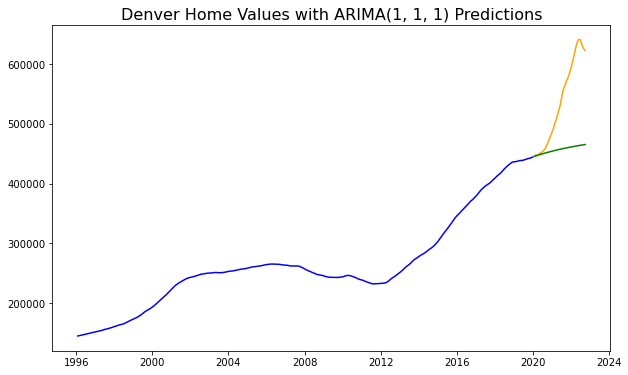

In [73]:
# Instantiate best model.
hv_arima = ARIMA(endog = hv_y_train, order = (1, 1, 1))

# Fit ARIMA model.
hv_model = hv_arima.fit()

# Generate predictions based on test set.
hv_preds = hv_model.predict(start = hv_y_test.index[0], end = hv_y_test.index[-1])

# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(hv_y_train.index, hv_y_train, color = 'blue')

# Plot testing data.
plt.plot(hv_y_test.index, hv_y_test, color = 'orange')

# Plot predicted test values.
plt.plot(hv_y_test.index, hv_preds, color = 'green')

plt.title(label = 'Denver Home Values with ARIMA(1, 1, 1) Predictions', fontsize=16)
plt.show();

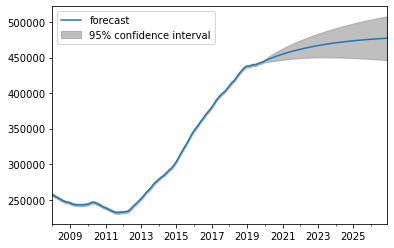

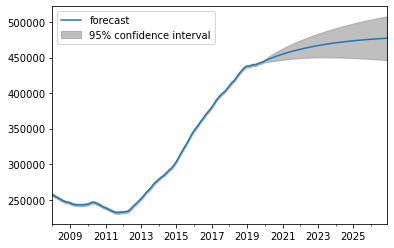

In [100]:
plot_predict(hv_model, start = '2008-01-31', end = '2026-12-31')

#### `median_sale_price` Dataframe

In [67]:
# Create train-test split.
sp_y_train, sp_y_test = train_test_split(median_sale_price['value'], test_size = 0.1, shuffle = False)

In [68]:
# Starting AIC, p, and q.
best_aic = 99999999
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 3, q) model.
            print(f'Attempting ARIMA({p}, 3, {q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = sp_y_train, order = (p, 3, q))
            
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 3, q) model.
            print(f'The AIC for ARIMA({p},3,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},3,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting ARIMA(0, 3, 0)
The AIC for ARIMA(0,3,0) is: 2983.074180815506
Attempting ARIMA(0, 3, 1)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No freque

The AIC for ARIMA(0,3,1) is: 2857.9043637605223
Attempting ARIMA(0, 3, 2)
The AIC for ARIMA(0,3,2) is: 2858.112471190544
Attempting ARIMA(0, 3, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No freque

The AIC for ARIMA(0,3,3) is: 2859.554368305613
Attempting ARIMA(0, 3, 4)
The AIC for ARIMA(0,3,4) is: 2861.38012023791
Attempting ARIMA(1, 3, 0)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: Co

The AIC for ARIMA(1,3,0) is: 3003.285159437579
Attempting ARIMA(1, 3, 1)
The AIC for ARIMA(1,3,1) is: 2857.397683369989
Attempting ARIMA(1, 3, 2)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No freque

The AIC for ARIMA(1,3,2) is: 2861.37796147242
Attempting ARIMA(1, 3, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


The AIC for ARIMA(1,3,3) is: 2862.141082472316
Attempting ARIMA(1, 3, 4)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: Co

The AIC for ARIMA(1,3,4) is: 2924.390420066363
Attempting ARIMA(2, 3, 0)
The AIC for ARIMA(2,3,0) is: 3065.107705928125
Attempting ARIMA(2, 3, 1)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


The AIC for ARIMA(2,3,1) is: 2859.375627552332
Attempting ARIMA(2, 3, 2)
The AIC for ARIMA(2,3,2) is: 2861.387717627641
Attempting ARIMA(2, 3, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


The AIC for ARIMA(2,3,3) is: 2947.934739868216
Attempting ARIMA(2, 3, 4)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: Co

The AIC for ARIMA(2,3,4) is: 2938.9806632399705
Attempting ARIMA(3, 3, 0)
The AIC for ARIMA(3,3,0) is: 3039.93336398489
Attempting ARIMA(3, 3, 1)
The AIC for ARIMA(3,3,1) is: 2861.2934289641407
Attempting ARIMA(3, 3, 2)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: Co

The AIC for ARIMA(3,3,2) is: 2920.4904518042904
Attempting ARIMA(3, 3, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: Co

The AIC for ARIMA(3,3,3) is: 2935.4315807998933
Attempting ARIMA(3, 3, 4)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: Val

The AIC for ARIMA(3,3,4) is: 2951.2725186751777
Attempting ARIMA(4, 3, 0)
The AIC for ARIMA(4,3,0) is: 3021.07156557636
Attempting ARIMA(4, 3, 1)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966:

The AIC for ARIMA(4,3,1) is: 2862.944899318837
Attempting ARIMA(4, 3, 2)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978:

The AIC for ARIMA(4,3,2) is: 2928.311787238213
Attempting ARIMA(4, 3, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978:

The AIC for ARIMA(4,3,3) is: 2937.011345985632
Attempting ARIMA(4, 3, 4)
The AIC for ARIMA(4,3,4) is: 2948.505790534213


MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(1,3,1).
This model has an AIC of 2857.397683369989.


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


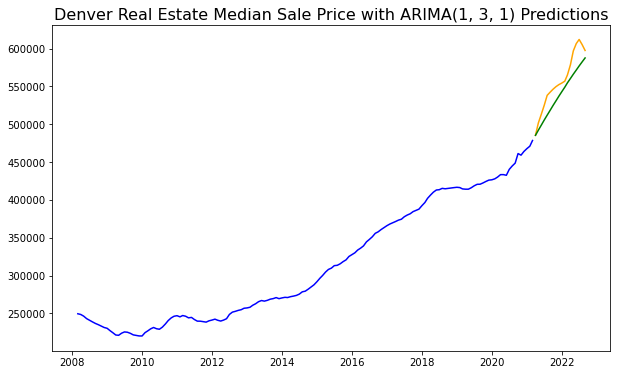

In [74]:
# Instantiate best model.
sp_arima = ARIMA(endog = sp_y_train, order = (1, 3, 1))

# Fit ARIMA model.
sp_model = sp_arima.fit()

# Generate predictions based on test set.
sp_preds = sp_model.predict(start = sp_y_test.index[0], end = sp_y_test.index[-1])

# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(sp_y_train.index, sp_y_train, color = 'blue')

# Plot testing data.
plt.plot(sp_y_test.index, sp_y_test, color = 'orange')

# Plot predicted test values.
plt.plot(sp_y_test.index, sp_preds, color = 'green')

plt.title(label = 'Denver Real Estate Median Sale Price with ARIMA(1, 3, 1) Predictions', fontsize=16)
plt.show();

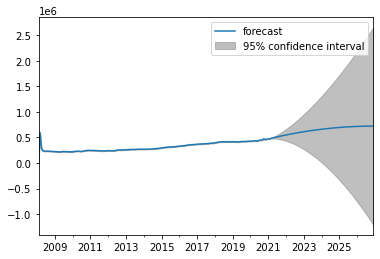

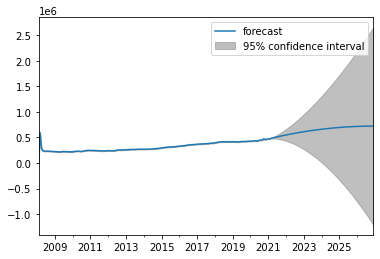

In [93]:
plot_predict(sp_model, start = '2008-02-29', end = '2026-12-31')

#### `rentals` Dataframe

In [70]:
# Create train-test split.
r_y_train, r_y_test = train_test_split(rentals['value'], test_size = 0.1, shuffle = False)

In [71]:
# Starting AIC, p, and q.
best_aic = 99999999
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 2, q) model.
            print(f'Attempting ARIMA({p}, 2, {q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = r_y_train, order = (p, 2, q))
            
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 2, q) model.
            print(f'The AIC for ARIMA({p},2,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},2,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting ARIMA(0, 2, 0)
The AIC for ARIMA(0,2,0) is: 665.5469599057182
Attempting ARIMA(0, 2, 1)
The AIC for ARIMA(0,2,1) is: 644.5676066348601
Attempting ARIMA(0, 2, 2)
The AIC for ARIMA(0,2,2) is: 645.5562498326467
Attempting ARIMA(0, 2, 3)
The AIC for ARIMA(0,2,3) is: 644.4530120255046
Attempting ARIMA(0, 2, 4)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No freque

The AIC for ARIMA(0,2,4) is: 638.7998494728912
Attempting ARIMA(1, 2, 0)
The AIC for ARIMA(1,2,0) is: 650.9107789845682
Attempting ARIMA(1, 2, 1)
The AIC for ARIMA(1,2,1) is: 643.6246632823157
Attempting ARIMA(1, 2, 2)
The AIC for ARIMA(1,2,2) is: 646.2567182041711
Attempting ARIMA(1, 2, 3)
The AIC for ARIMA(1,2,3) is: 623.0537754517077
Attempting ARIMA(1, 2, 4)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No freque

The AIC for ARIMA(1,2,4) is: 624.574021576762
Attempting ARIMA(2, 2, 0)
The AIC for ARIMA(2,2,0) is: 651.2940158696746
Attempting ARIMA(2, 2, 1)
The AIC for ARIMA(2,2,1) is: 643.679648440532
Attempting ARIMA(2, 2, 2)
The AIC for ARIMA(2,2,2) is: 641.3794695379785
Attempting ARIMA(2, 2, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No freque

The AIC for ARIMA(2,2,3) is: 637.2241214098983
Attempting ARIMA(2, 2, 4)
The AIC for ARIMA(2,2,4) is: 626.5737948856382
Attempting ARIMA(3, 2, 0)
The AIC for ARIMA(3,2,0) is: 641.3308770566679
Attempting ARIMA(3, 2, 1)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py

The AIC for ARIMA(3,2,1) is: 631.1655839669969
Attempting ARIMA(3, 2, 2)
The AIC for ARIMA(3,2,2) is: 620.8652538396914
Attempting ARIMA(3, 2, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/

The AIC for ARIMA(3,2,3) is: 620.9059250906053
Attempting ARIMA(3, 2, 4)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/

The AIC for ARIMA(3,2,4) is: 622.1460290800779
Attempting ARIMA(4, 2, 0)
The AIC for ARIMA(4,2,0) is: 630.3743154246476
Attempting ARIMA(4, 2, 1)
The AIC for ARIMA(4,2,1) is: 626.7637006749258
Attempting ARIMA(4, 2, 2)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No freque

The AIC for ARIMA(4,2,2) is: 616.4399510552972
Attempting ARIMA(4, 2, 3)


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966:

The AIC for ARIMA(4,2,3) is: 620.8525161984415
Attempting ARIMA(4, 2, 4)
The AIC for ARIMA(4,2,4) is: 622.1751652108624


MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(4,2,2).
This model has an AIC of 616.4399510552972.


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lmarett8/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/

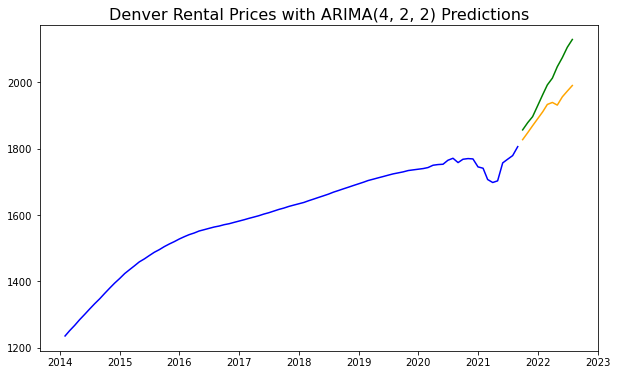

In [75]:
# Instantiate best model.
r_arima = ARIMA(endog = r_y_train, order = (4, 2, 2))

# Fit ARIMA model.
r_model = r_arima.fit()

# Generate predictions based on test set.
r_preds = r_model.predict(start = r_y_test.index[0], end = r_y_test.index[-1])

# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(r_y_train.index, r_y_train, color = 'blue')

# Plot testing data.
plt.plot(r_y_test.index, r_y_test, color = 'orange')

# Plot predicted test values.
plt.plot(r_y_test.index, r_preds, color = 'green')

plt.title(label = 'Denver Rental Prices with ARIMA(4, 2, 2) Predictions', fontsize=16)
plt.show();

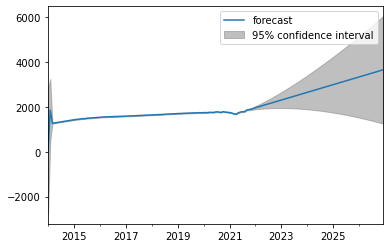

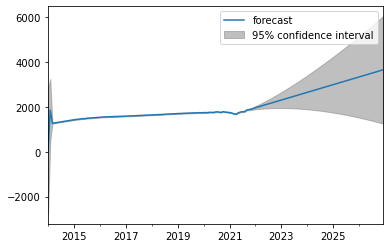

In [99]:
plot_predict(r_model, start = '2014-01-31', end = '2026-12-31')

In [ ]:
plot_acf()

In [ ]:
denver_rentals = data[(data['region_id'] == 394530) & (data['indicator_id'] == 'RSSA')]

In [ ]:
denver_rentals['date'] = pd.to_datetime(denver_rentals['date'])

In [ ]:
denver_rentals.plot(x = 'date', y = 'value');